In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

# Download latest version
start_path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animals10


In [9]:
dataset_path = '/kaggle/input/animals10/raw-img'

In [10]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,      # Augmentation to reduce overfitting
    horizontal_flip=True
)

In [12]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 20947 images belonging to 10 classes.


In [13]:
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False # Important for Confusion Matrix later
)

Found 5232 images belonging to 10 classes.


In [14]:
model = Sequential([
    # Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    
    # Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Flatten and Dense
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5), # Prevents overfitting
    Dense(10, activation='softmax') # 10 Classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1765035318.504417      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10 
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1765035414.186507     142 service.cc:148] XLA service 0x7ded5c004230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765035414.187314     142 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1765035414.499159     142 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/655 ━━━━━━━━━━━━━━━━━━━━ 59:34 5s/step - accuracy: 0.0625 - loss: 2.3371

I0000 00:00:1765035417.636222     142 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


655/655 ━━━━━━━━━━━━━━━━━━━━ 222s 331ms/step - accuracy: 0.2806 - loss: 2.0223 - val_accuracy: 0.4864 - val_loss: 1.4770
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 149s 228ms/step - accuracy: 0.5128 - loss: 1.4194 - val_accuracy: 0.5891 - val_loss: 1.1849
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 148s 225ms/step - accuracy: 0.5834 - loss: 1.2277 - val_accuracy: 0.6384 - val_loss: 1.0428
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 147s 224ms/step - accuracy: 0.6228 - loss: 1.1136 - val_accuracy: 0.6569 - val_loss: 0.9954
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 147s 225ms/step - accuracy: 0.6519 - loss: 1.0304 - val_accuracy: 0.6779 - val_loss: 0.9643
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 148s 226ms/step - accuracy: 0.6643 - loss: 0.9977 - val_accuracy: 0.6923 - val_loss: 0.9090
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 158s 241ms/step - accuracy: 0.6896 - loss: 0.9248 - val_accuracy: 0.6871 - val_loss: 0.9160
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 159s 243ms/step - accuracy: 0.7009 - loss: 0.89

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

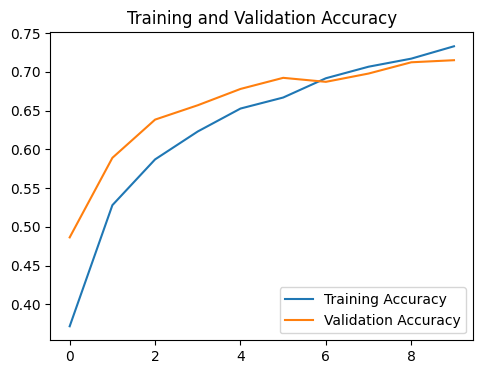

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

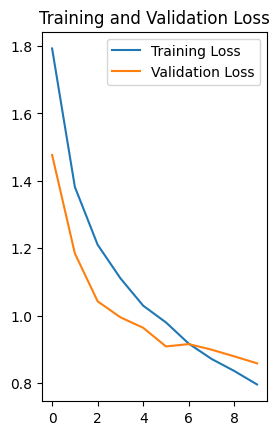

In [19]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
class_names = list(train_generator.class_indices.keys())
print(f"Classes detected: {class_names}")

# Define 'Safe' farm animals
safe_animals = ['cane', 'gatto', 'gallina', 'mucca', 'pecora', 'cavallo']

Classes detected: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [21]:
def check_intrusion(prediction_index):
    detected_animal = class_names[prediction_index]
    
    print(f"System Detected: {detected_animal.upper()}")
    
    if detected_animal in safe_animals:
        print("Status: AUTHORIZED FARM ANIMAL. (No Action)")
        return "Green"
    else:
        print("Status: *** INTRUSION ALERT! WILD ANIMAL DETECTED ***")
        return "Red"

# --- 7. FINAL DEMO ON A FEW IMAGES ---
# Get a batch of images from validation set
x_val, y_val = next(validation_generator)
predictions = model.predict(x_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


System Detected: CANE
Status: AUTHORIZED FARM ANIMAL. (No Action)
System Detected: CANE
Status: AUTHORIZED FARM ANIMAL. (No Action)
System Detected: CANE
Status: AUTHORIZED FARM ANIMAL. (No Action)


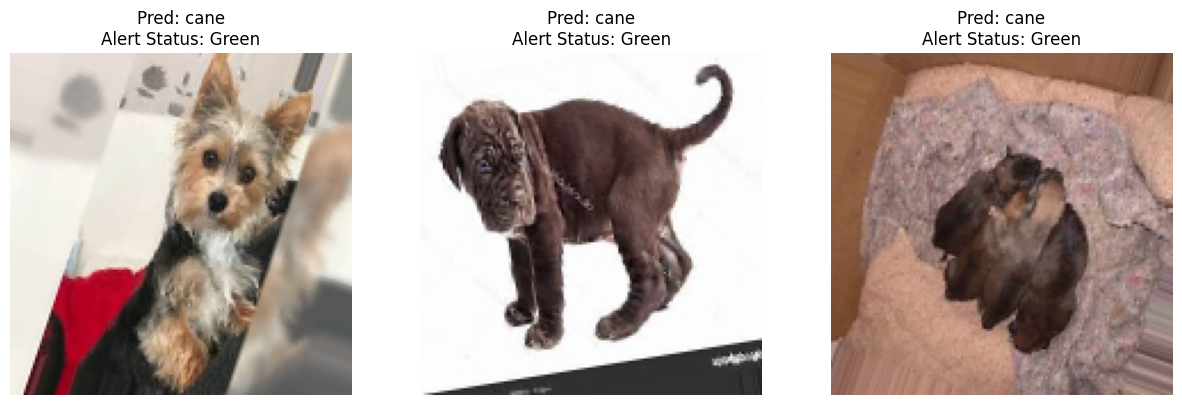

Model saved as animals_cnn_model.h5


In [22]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_val[i])
    plt.axis('off')
    
    pred_idx = np.argmax(predictions[i])
    status_color = check_intrusion(pred_idx)
    
    plt.title(f"Pred: {class_names[pred_idx]}\nAlert Status: {status_color}")

plt.show()

#model.save('animals_cnn_model.h5')
#print("Model saved as animals_cnn_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


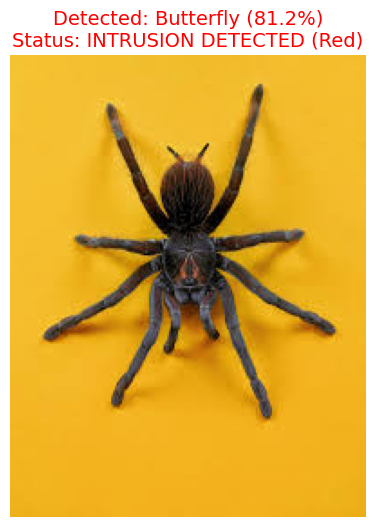

In [29]:
translation_dict = {
    'cane': 'Dog',
    'gatto': 'Cat',
    'elefante': 'Elephant',
    'farfalla': 'Butterfly',
    'gallina': 'Chicken',
    'mucca': 'Cow',
    'pecora': 'Sheep',
    'ragno': 'Spider',
    'scoiattolo': 'Squirrel',
    'cavallo': 'Horse'
}
idx_to_label = {v: k for k, v in train_generator.class_indices.items()}
def predict_from_url(url):
    """
    Downloads an image using a 'fake' browser header to avoid 403 errors.
    """
    # --- FIX STARTS HERE ---
    # We create a request WITH headers so we look like a Chrome browser
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    req_object = urllib.request.Request(url, headers=headers)
    
    # Open the request object, not just the string URL
    req = urllib.request.urlopen(req_object)
    # --- FIX ENDS HERE ---

    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) 
    
    # Resize to what the model expects (150x150)
    img_resized = cv2.resize(img, (150, 150))
    
    # Preprocess (Scale by 1/255)
    img_array = np.expand_dims(img_resized, axis=0) / 255.0
    
    # PREDICT
    prediction = model.predict(img_array)
    pred_idx = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    
    # TRANSLATE
    italian_name = idx_to_label[pred_idx]
    english_name = translation_dict[italian_name]
    
    # INTRUSION CHECK
    safe_animals = ['Dog', 'Cat', 'Chicken', 'Cow', 'Sheep', 'Horse']
    if english_name in safe_animals:
        status = "AUTHORIZED (Green)"
        color = (0, 255, 0) 
    else:
        status = "INTRUSION DETECTED (Red)"
        color = (255, 0, 0)
        
    # DISPLAY
    plt.figure(figsize=(6, 6))
    # Convert BGR (OpenCV) to RGB (Matplotlib) for correct colors
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Detected: {english_name} ({confidence:.1f}%)\nStatus: {status}", 
              fontsize=14, color='red' if 'INTRUSION' in status else 'green')
    plt.show()

# Test again with the same URL
test_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsGwQVD8NGiiJXiTLwSU7BQInkrPKLmJ9RNA&s"
predict_from_url(test_url)

Generating predictions for evaluation... (This might take a moment)
164/164 ━━━━━━━━━━━━━━━━━━━━ 35s 213ms/step

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

        cane       0.60      0.85      0.71       972
     cavallo       0.66      0.72      0.69       524
    elefante       0.74      0.63      0.68       289
    farfalla       0.88      0.73      0.80       422
     gallina       0.79      0.85      0.82       619
       gatto       0.71      0.41      0.52       333
       mucca       0.64      0.51      0.57       373
      pecora       0.79      0.43      0.56       364
       ragno       0.81      0.90      0.86       964
  scoiattolo       0.74      0.55      0.63       372

    accuracy                           0.72      5232
   macro avg       0.74      0.66      0.68      5232
weighted avg       0.73      0.72      0.71      5232



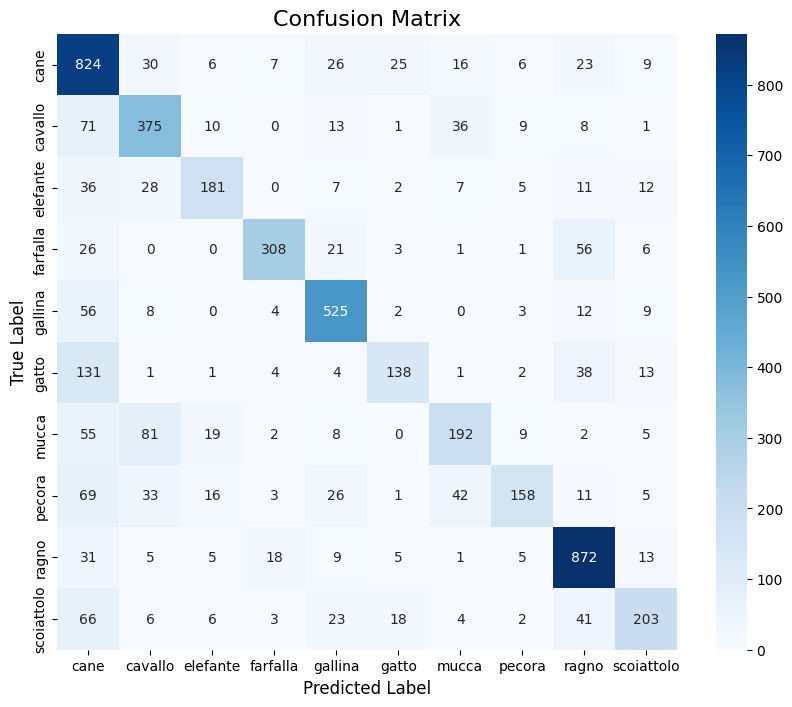

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


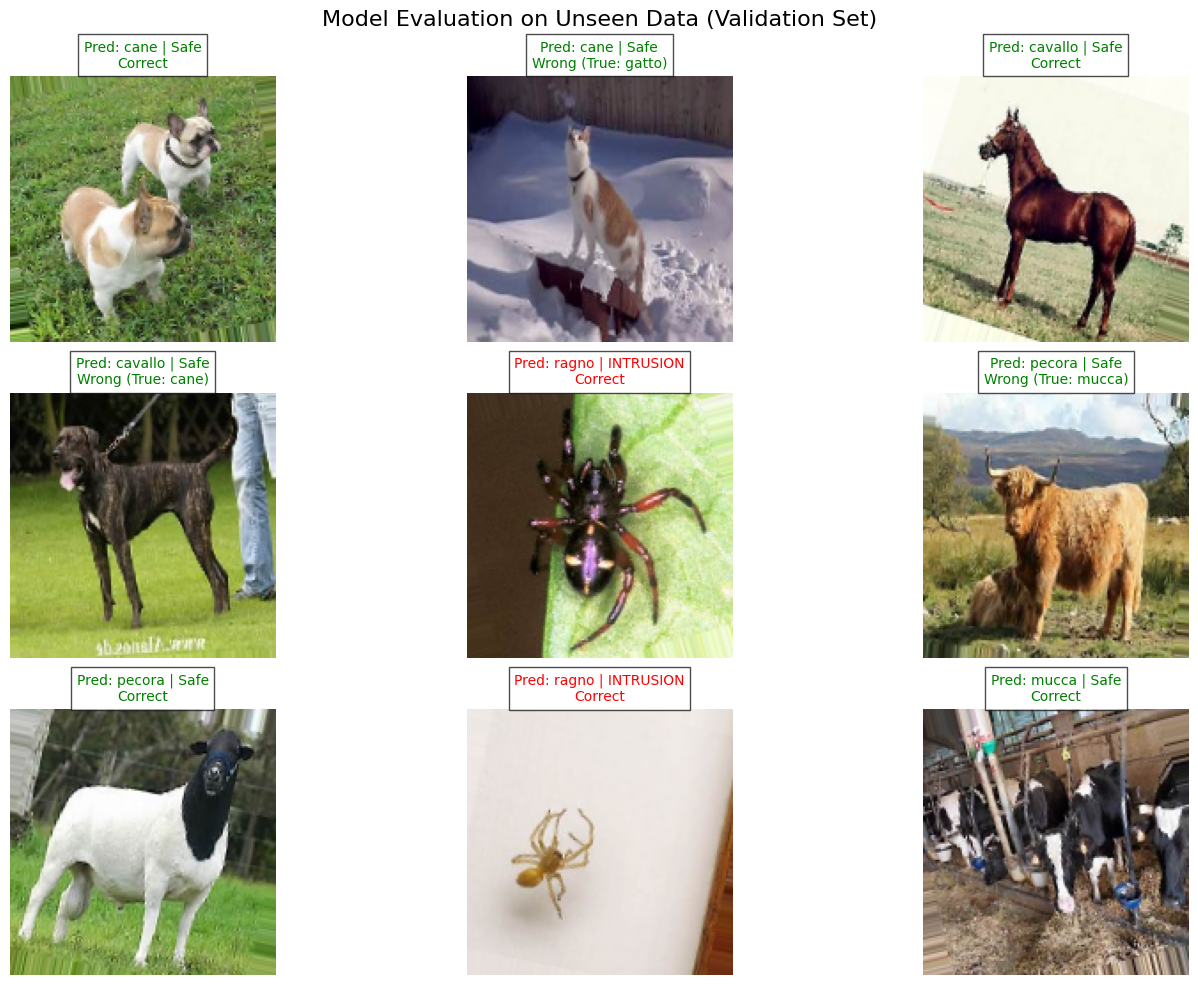

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. PREPARE THE DATA ---
# We reset the validation generator to ensure we get labels in the correct order
# and process the entire dataset exactly once.
validation_generator.shuffle = False
validation_generator.reset()

print("Generating predictions for evaluation... (This might take a moment)")
# Get predictions for all validation images
predictions = model.predict(validation_generator)
predicted_indices = np.argmax(predictions, axis=1)

# Get true labels from the generator
true_indices = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# --- 2. CLASSIFICATION REPORT (Precision, Recall, F1) ---
print("\n--- CLASSIFICATION REPORT ---")
report = classification_report(true_indices, predicted_indices, target_names=class_labels)
print(report)

# --- 3. CONFUSION MATRIX VISUALIZATION ---
cm = confusion_matrix(true_indices, predicted_indices)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# --- 4. "UNSEEN DATA" VISUALIZATION (Labeled Images) ---
# We pick a random batch of images to show "Real-world" performance
validation_generator.shuffle = True # Shuffle specifically for this random sample
validation_generator.reset()
x_sample, y_sample = next(validation_generator)

# Define our Intrusion Logic again for the display
safe_animals = ['cane', 'gatto', 'gallina', 'mucca', 'pecora', 'cavallo']

# Predict on this specific batch
batch_preds = model.predict(x_sample)
batch_indices = np.argmax(batch_preds, axis=1)

plt.figure(figsize=(15, 10))
plt.suptitle("Model Evaluation on Unseen Data (Validation Set)", fontsize=16)

# Show 9 images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    
    # Display Image
    plt.imshow(x_sample[i])
    plt.axis('off')
    
    # Get labels
    pred_label = class_labels[batch_indices[i]]
    true_label_idx = np.argmax(y_sample[i])
    true_label = class_labels[true_label_idx]
    
    # Intrusion Logic Check
    if pred_label in safe_animals:
        status = "Safe"
        color = 'green'
    else:
        status = "INTRUSION"
        color = 'red'
        
    # Check if prediction was correct
    if pred_label == true_label:
        result_text = "Correct"
        box_color = "black"
    else:
        result_text = f"Wrong (True: {true_label})"
        box_color = "orange" # Highlight mistakes
        
    plt.title(f"Pred: {pred_label} | {status}\n{result_text}", 
              color=color, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()